In [10]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics



# python imports
import re
import json
import os
from collections import Counter
import datetime as dt
!pip install hazm
from hazm import *

# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import plotly.graph_objs as go
import plotly.express as px

# Saving models
import pickle
from google.colab import files

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
upload_file = files.upload()

Saving persian.txt to persian.txt


In [12]:
df = pd.read_csv('dataProPersian.csv')
df

,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount
0,khabarbato,@khabarbato,2021-08-20T10:36:48.000Z,جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...,NaN,NaN,NaN
1,Meysam,@Meysam55541337,2021-08-19T19:35:32.000Z,برای هزارمین بار \nواکسن #آسترازنکا که به دروغ...,1.0,1.0,NaN
2,مهران خسروزاده,@khosrozadehpr,2021-08-19T17:12:38.000Z,.../ اما بیماران متعددی دیده ام که واکسن #سینو...,2.0,NaN,35
3,freudianassociation,@freudianassoci1,2021-08-19T15:49:57.000Z,VAXXX DEATHS SLOWLY BEING REPORTED BY MSM\nhtt...,NaN,6.0,3
4,dken,@dken999,2021-08-19T15:44:08.000Z,دوستان من ده روز پیش واکسن استرازنکا زدم. یه د...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15114,Shervinmohandesi,@mohandesi_sh,2021-08-11T19:08:16.000Z,در ایران2نوع تفکرداریم:ضد مذهبیون :تورفتی هیئت...,1.0,NaN,2.0
15115,alirezazade,@Snalirezazade,2021-08-11T17:21:37.000Z,#کادر_درمان\n#کرونا\n#محرمQuote Tweet\nآقای پر...,NaN,NaN,NaN
15116,محمدمهدی سعادت یار,@saadatyar76,2021-08-11T17:17:25.000Z,آقای #زالی ما اصلا از اظهارات شما متعجب نشدیم ...,NaN,NaN,2.0
15117,@y@¡¡,@,2021-08-11T16:45:28.000Z,می‌گم مگه توی #محرم کرونا تعطیل کرده بساطش رو ...,NaN,NaN,3.0


## ستون های مورد نیاز

In [13]:
needed_columns=['User','PostDate','TweetText']
df=df[needed_columns]
df.TweetText
#df.head()

0        جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...
1        برای هزارمین بار \nواکسن #آسترازنکا که به دروغ...
2        .../ اما بیماران متعددی دیده ام که واکسن #سینو...
3        VAXXX DEATHS SLOWLY BEING REPORTED BY MSM\nhtt...
4        دوستان من ده روز پیش واکسن استرازنکا زدم. یه د...
                               ...                        
15114    در ایران2نوع تفکرداریم:ضد مذهبیون :تورفتی هیئت...
15115    #کادر_درمان\n#کرونا\n#محرمQuote Tweet\nآقای پر...
15116    آقای #زالی ما اصلا از اظهارات شما متعجب نشدیم ...
15117    می‌گم مگه توی #محرم کرونا تعطیل کرده بساطش رو ...
15118    یاران #امام_حسین امروز #کادر_درمان هستن \nکه ب...
Name: TweetText, Length: 15119, dtype: object

## تغییر نوع بعضی ستون ها

In [14]:
df.User=df.User.astype('category')
df.User=df.User.cat.codes
df.PostDate=pd.to_datetime(df.PostDate).dt.date
df.head()

,User,PostDate,TweetText
0,3689,2021-08-20,جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...
1,1819,2021-08-19,برای هزارمین بار \nواکسن #آسترازنکا که به دروغ...
2,6762,2021-08-19,.../ اما بیماران متعددی دیده ام که واکسن #سینو...
3,3546,2021-08-19,VAXXX DEATHS SLOWLY BEING REPORTED BY MSM\nhtt...
4,3435,2021-08-19,دوستان من ده روز پیش واکسن استرازنکا زدم. یه د...


# شروع پاکسازی توییت ها
## حذف آدرس های اینترنتی url

In [15]:
texts=df.TweetText
remove_url=lambda x:re.sub(r'http\S+','',str(x))
texts_lr=texts.apply(remove_url)
texts_lr

0        جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...
1        برای هزارمین بار \nواکسن #آسترازنکا که به دروغ...
2        .../ اما بیماران متعددی دیده ام که واکسن #سینو...
3        VAXXX DEATHS SLOWLY BEING REPORTED BY MSM\n\n#...
4        دوستان من ده روز پیش واکسن استرازنکا زدم. یه د...
                               ...                        
15114    در ایران2نوع تفکرداریم:ضد مذهبیون :تورفتی هیئت...
15115    #کادر_درمان\n#کرونا\n#محرمQuote Tweet\nآقای پر...
15116    آقای #زالی ما اصلا از اظهارات شما متعجب نشدیم ...
15117    می‌گم مگه توی #محرم کرونا تعطیل کرده بساطش رو ...
15118    یاران #امام_حسین امروز #کادر_درمان هستن \nکه ب...
Name: TweetText, Length: 15119, dtype: object

## تبدیل همه حروف به حرف کوچک

In [16]:
to_lower=lambda x: x.lower()
texts_lr_lc=texts_lr.apply(to_lower)
texts_lr_lc

0        جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...
1        برای هزارمین بار \nواکسن #آسترازنکا که به دروغ...
2        .../ اما بیماران متعددی دیده ام که واکسن #سینو...
3        vaxxx deaths slowly being reported by msm\n\n#...
4        دوستان من ده روز پیش واکسن استرازنکا زدم. یه د...
                               ...                        
15114    در ایران2نوع تفکرداریم:ضد مذهبیون :تورفتی هیئت...
15115    #کادر_درمان\n#کرونا\n#محرمquote tweet\nآقای پر...
15116    آقای #زالی ما اصلا از اظهارات شما متعجب نشدیم ...
15117    می‌گم مگه توی #محرم کرونا تعطیل کرده بساطش رو ...
15118    یاران #امام_حسین امروز #کادر_درمان هستن \nکه ب...
Name: TweetText, Length: 15119, dtype: object

## حذف علائم نگارشی

In [17]:
remove_puncs= lambda x:x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np=texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0        جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...
1        برای هزارمین بار \nواکسن آسترازنکا که به دروغ ...
2         اما بیماران متعددی دیده ام که واکسن سینوفارم ...
3        vaxxx deaths slowly being reported by msm\n\nک...
4        دوستان من ده روز پیش واکسن استرازنکا زدم یه در...
                               ...                        
15114    در ایران2نوع تفکرداریمضد مذهبیون تورفتی هیئت؛ز...
15115    کادردرمان\nکرونا\nمحرمquote tweet\nآقای پرستار...
15116    آقای زالی ما اصلا از اظهارات شما متعجب نشدیم ز...
15117    می‌گم مگه توی محرم کرونا تعطیل کرده بساطش رو ک...
15118    یاران امامحسین امروز کادردرمان هستن \nکه با جا...
Name: TweetText, Length: 15119, dtype: object

## حذف استاپ وردها

In [62]:
bad_chars = [';', ':', '!', "*", '@',  '#', '!', '$', '%', '^', '&', '*', '(', ')', '_',
'-', '=', '`', '~', '1', '2', '3', '4', '5', '6', '7', '8', '9', '<<', '>>', '«', '»', '،', '؛', '.', '\n','·','رژیم'
,'قیام','میکنه','دارن','باشه','بشه']
norm = Normalizer()
texts_lr_lc_np = []
for tweet in df.TweetText:
    tweet = tweet.replace('_', ' ')
    tweet = tweet.replace('#', ' ')
    tweet = tweet.replace('\n', ' ')
    tweet = "".join([char for char in tweet if char not in string.ascii_letters])
    tweet = "".join([char for char in tweet if char not in string.punctuation ])
    for i in bad_chars:
        tweet = tweet.replace(i, '')
    tweet = re.sub('[۰-۹0-9]+', '', tweet)
    tweet = norm.character_refinement(tweet)
    tweet = tweet.replace('\u200c', '')
    texts_lr_lc_np.append(tweet)
texts_lr_lc_np

['جدیدترین آمار کرونا نهم مرداد چهارصد کرونا واکسیناسیون سلامت نمکی واکسن کووید واکسن کرونا آمار کرونا ماسک بهداشت آسترازنکا واکسن سینوفارم تهران مشهد تبریز خوزستان اصفهان',
 'هزارمین واکسن آسترازنکا دروغ سوئدی معرفی انگلیسی آمار فوتی افزایش واکسیناسیون ایران افزایش کرد؟ همان اتفاقی هند رخ داد؟ اتحادیه اروپا قرارداد خرید تمدید نکرد؟ وچرا آسترازنکا واکسن اهدایی جهان سومی هاست؟',
 'بیماران متعددی واکسن سینوفارم چینی اسپوتنیک روسی زده کارشان بستری سی یو کشیده فوت نمودهاند واکسن استرازنکا بهارات اظهار نظر',
 'کرونا مرگ واکسن کرونا فایزر آسترازنکا تاویستوک مافیا ایران ستائیم اینترنت میترا انجمن فرویدی منبع بیت شوت',
 'دوستان واکسن استرازنکا زدم دردی خفیف متوسط حای بدنم میاد اوایلش شکمم سرم بازوم درد خفیف بالمس حس میشه فرق سرم ریتوییت ریتوییت استرازنکا',
 'جدیدترین آمار کرونا مرداد چهارصد کرونا واکسیناسیون سلامت بیمارستان واکسن کووید واکسن کرونا کرونا شکست میدهیم ماسک وزارت بهداشت آسترازنکا واکسن برکت تهران مشهد تبریز خوزستان اصفهان',
 'رانت اونی شیشه خالی واکسن آسترازنکا نابود برده دلال فرو

In [63]:
norm = Normalizer()
stopWords_persian = '\n'.join(sorted(list([norm.normalize(words) for words in codecs.open('persian', encoding='utf-8').read().split('\n') if words])))
stopWords_chars = '\n'.join(sorted(list([norm.normalize(words) for words in codecs.open('chars', encoding='utf-8').read().split('\n') if words])))
stopWords_nonverbal = '\n'.join(sorted(list([norm.normalize(words) for words in codecs.open('nonverbal', encoding='utf-8').read().split('\n') if words])))
stopWords_short = '\n'.join(sorted(list([norm.normalize(words) for words in codecs.open('short', encoding='utf-8').read().split('\n') if words])))
stopWords_verbal = '\n'.join(sorted(list([norm.normalize(words) for words in codecs.open('verbal', encoding='utf-8').read().split('\n') if words])))
stopWords = stopWords_persian + stopWords_chars + stopWords_nonverbal + stopWords_short + stopWords_verbal
stopWords = [stopWord for stopWord in stopWords.split('\n')]

In [64]:
texts_lr_lc_np_ns = []
for new_tweet in texts_lr_lc_np:
    
    new_tweet = ' '.join([new_tweet for new_tweet in new_tweet.split() if new_tweet not in stopWords])
    new_tweet = norm.normalize(new_tweet)
    new_tweet = new_tweet.replace('\u200c', '')
    texts_lr_lc_np_ns.append(str(new_tweet))
texts_lr_lc_np_ns

['جدیدترین آمار کرونا نهم مرداد چهارصد کرونا واکسیناسیون سلامت نمکی واکسن کووید واکسن کرونا آمار کرونا ماسک بهداشت آسترازنکا واکسن سینوفارم تهران مشهد تبریز خوزستان اصفهان',
 'هزارمین واکسن آسترازنکا دروغ سوئدی معرفی انگلیسی آمار فوتی افزایش واکسیناسیون ایران افزایش کرد؟ اتفاقی هند رخ داد؟ اتحادیه اروپا قرارداد خرید تمدید نکرد؟ وچرا آسترازنکا واکسن اهدایی جهان سومی هاست؟',
 'بیماران متعددی واکسن سینوفارم چینی اسپوتنیک روسی زده کارشان بستری سی یو کشیده فوت نمودهاند واکسن استرازنکا بهارات اظهار نظر',
 'کرونا مرگ واکسن کرونا فایزر آسترازنکا تاویستوک مافیا ایران ستائیم اینترنت میترا انجمن فرویدی منبع بیت شوت',
 'دوستان واکسن استرازنکا زدم دردی خفیف متوسط حای بدنم میاد اوایلش شکمم سرم بازوم درد خفیف بالمس حس میشه فرق سرم ریتوییت ریتوییت استرازنکا',
 'جدیدترین آمار کرونا مرداد چهارصد کرونا واکسیناسیون سلامت بیمارستان واکسن کووید واکسن کرونا کرونا شکست میدهیم ماسک وزارت بهداشت آسترازنکا واکسن برکت تهران مشهد تبریز خوزستان اصفهان',
 'رانت اونی شیشه خالی واکسن آسترازنکا نابود برده دلال فروخته ک

## جدا کردن تک تک کلمات

In [65]:
words_list=[word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]

['جدیدترین', 'آمار', 'کرونا', 'نهم', 'مرداد']

## پیدا کردن کلمات با بیشترین تکرار و مصور سازی

In [66]:
word_counts=Counter(words_list).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','tekrar']
display(word_df.head(5))
px.bar(word_df,x='word',y='tekrar',title='Most common words with corona hastags in twitter')

,word,tekrar
0,کرونا,16958
1,واکسن,12259
2,ایران,3828
3,نفر,2122
4,مرگ,1667


## قرار دادن متون تمیز شده در قالب دیتافریم

In [23]:
display(df.head(5))
df.TweetText=texts_lr_lc_np_ns
display(df.head(5))

,User,PostDate,TweetText
0,3689,2021-08-20,جدیدترین آمار کرونا بیست و نهم مرداد هزار و چه...
1,1819,2021-08-19,برای هزارمین بار \nواکسن #آسترازنکا که به دروغ...
2,6762,2021-08-19,.../ اما بیماران متعددی دیده ام که واکسن #سینو...
3,3546,2021-08-19,VAXXX DEATHS SLOWLY BEING REPORTED BY MSM\nhtt...
4,3435,2021-08-19,دوستان من ده روز پیش واکسن استرازنکا زدم. یه د...


,User,PostDate,TweetText
0,3689,2021-08-20,جدیدترین آمار کرونا نهم مرداد چهارصد کرونا واک...
1,1819,2021-08-19,هزارمین واکسن آسترازنکا دروغ سوئدی معرفی انگلی...
2,6762,2021-08-19,بیماران متعددی واکسن سینوفارم چینی اسپوتنیک رو...
3,3546,2021-08-19,کرونا مرگ واکسن کرونا فایزر آسترازنکا تاویستوک...
4,3435,2021-08-19,دوستان واکسن استرازنکا زدم دردی خفیف متوسط حای...


## پاکسازی مجدد متن

In [24]:
def clean_text(TweetText):
    TweetText = re.sub('\[.*?\]', '', TweetText)
    TweetText = re.sub('https?://\S+|www\.\S+', '', TweetText)
    TweetText = re.sub('<.*?>+', '', TweetText)
    TweetText = re.sub('[%s]' % re.escape(string.punctuation), '', TweetText)
    TweetText = re.sub('\n', '', TweetText)
    TweetText = re.sub('\w*\d\w*', '', TweetText)
    return TweetText
df['TweetText'] = df['TweetText'].apply(lambda x: clean_text(x))
display(df)

,User,PostDate,TweetText
0,3689,2021-08-20,جدیدترین آمار کرونا نهم مرداد چهارصد کرونا واک...
1,1819,2021-08-19,هزارمین واکسن آسترازنکا دروغ سوئدی معرفی انگلی...
2,6762,2021-08-19,بیماران متعددی واکسن سینوفارم چینی اسپوتنیک رو...
3,3546,2021-08-19,کرونا مرگ واکسن کرونا فایزر آسترازنکا تاویستوک...
4,3435,2021-08-19,دوستان واکسن استرازنکا زدم دردی خفیف متوسط حای...
...,...,...,...
15114,2876,2021-08-11,ایراننوع تفکرداریمضد مذهبیون تورفتی هیئتزیارتم...
15115,3264,2021-08-11,کادر درمان کرونا محرم پرستار هموطن عزیز مراسم ...
15116,6552,2021-08-11,زالی اظهارات متعجب نشدیم سال ناکارآمدی مدیریت ...
15117,74,2021-08-11,میگم مگه محرم کرونا تعطیل بساطش ملت ماسک فاصله...


In [25]:
def remove_emoji(TweetText):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', TweetText)

In [26]:
df['TweetText']=df['TweetText'].apply(lambda x: remove_emoji(x))
display(df)

,User,PostDate,TweetText
0,3689,2021-08-20,جدیدترین آمار کرونا نهم مرداد چهارصد کرونا واک...
1,1819,2021-08-19,هزارمین واکسن آسترازنکا دروغ سوئدی معرفی انگلی...
2,6762,2021-08-19,بیماران متعددی واکسن سینوفارم چینی اسپوتنیک رو...
3,3546,2021-08-19,کرونا مرگ واکسن کرونا فایزر آسترازنکا تاویستوک...
4,3435,2021-08-19,دوستان واکسن استرازنکا زدم دردی خفیف متوسط حای...
...,...,...,...
15114,2876,2021-08-11,ایراننوع تفکرداریمضد مذهبیون تورفتی هیئتزیارتم...
15115,3264,2021-08-11,کادر درمان کرونا محرم پرستار هموطن عزیز مراسم ...
15116,6552,2021-08-11,زالی اظهارات متعجب نشدیم سال ناکارآمدی مدیریت ...
15117,74,2021-08-11,میگم مگه محرم کرونا تعطیل بساطش ملت ماسک فاصله...


## تحلیل احساسات

In [27]:
from __future__ import division, print_function, unicode_literals
import sklearn
from CommentToWordCounterTransformer import CommentToWordCounterTransformer
from WordCounterToVectorTransformer import WordCounterToVectorTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pickle, os



np.random.seed(42)

svm_model = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'svm_model.pkl')
preprocessing_pipline = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'preprocessing_pipline.pkl')

svm_model = pickle.load(open(svm_model, 'rb'))
preprocess_pipeline = pickle.load(open(preprocessing_pipline, 'rb'))

def predict_sentiment(new_comment, return_class_label = False):
    p_class = svm_model.predict(preprocess_pipeline.transform(new_comment).toarray())
    if return_class_label:
        return p_class[0]
    return "Positive!" if p_class[0] > 0 else "Negative!"

print('''

This app uses ML to predict setntiment (e.g., Positive or Negative)
of a given Persian text. Toexit  the app write  'exit' in terminal.

''')
pred_condition = {'Tweets':[],'Polarity':[]}
for tweet in df.TweetText:
    #to_predict = input('Input: ')
    to_predict = tweet
    if not to_predict:
        print('No input to predict sentiment!')
        print('\n')
        continue;

    elif to_predict:
        if (str(to_predict) == str('exit')):
            print('...  exit: 0')
            break;
        polarity = predict_sentiment(np.array([to_predict]))
        pred_condition['Tweets'].append(tweet)
        pred_condition['Polarity'].append(polarity)
        print('...', predict_sentiment(np.array([to_predict])))
        print('\n')
        continue;
    else:
        pass


Streaming output truncated to the last 5000 lines.


... Positive!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Positive!


... Positive!


... Positive!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Negative!


... Positive!


... Positive!


... Positive!


... Negative!


... Positive!


... Negative!


... Positive!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Negative!


... Positive!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Negative!


... Positive!


... Positive!


... Negative!


... Negative!


... Negative!


... Negative!


...

In [28]:
data_predicted = pd.DataFrame(pred_condition)
data_predicted

,Tweets,Polarity
0,جدیدترین آمار کرونا نهم مرداد چهارصد کرونا واک...,Negative!
1,هزارمین واکسن آسترازنکا دروغ سوئدی معرفی انگلی...,Positive!
2,بیماران متعددی واکسن سینوفارم چینی اسپوتنیک رو...,Negative!
3,کرونا مرگ واکسن کرونا فایزر آسترازنکا تاویستوک...,Negative!
4,دوستان واکسن استرازنکا زدم دردی خفیف متوسط حای...,Negative!
...,...,...
15114,ایراننوع تفکرداریمضد مذهبیون تورفتی هیئتزیارتم...,Negative!
15115,کادر درمان کرونا محرم پرستار هموطن عزیز مراسم ...,Negative!
15116,زالی اظهارات متعجب نشدیم سال ناکارآمدی مدیریت ...,Negative!
15117,میگم مگه محرم کرونا تعطیل بساطش ملت ماسک فاصله...,Negative!


In [29]:
counts_df=data_predicted.Polarity.value_counts().reset_index()
display(counts_df)

,index,Polarity
0,Negative!,10735
1,Positive!,4384


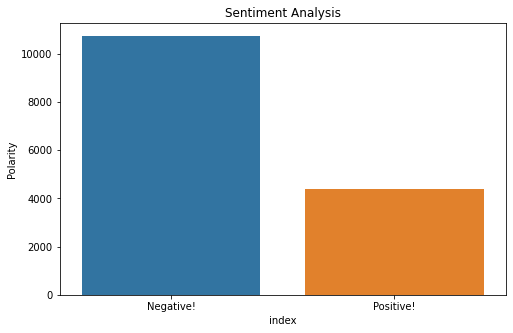

In [30]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='Polarity',data=counts_df).set_title('Sentiment Analysis')
plt.savefig('all Sentiment .png')

## رسم ابر کلمات

In [31]:
!pip install persian_wordcloud
from persian_wordcloud.wordcloud import STOPWORDS, PersianWordCloud
from os import path
from PIL import Image


     |████████████████████████████████| 65 kB 3.7 MB/s 
  Created wheel for persian-wordcloud: filename=persian_wordcloud-1.3.1-py3-none-any.whl size=65941 sha256=952cc507a7dc3a5a1a5f7f62366e58b225c6b7c2ad3c6937e286af2e832bb445
  Stored in directory: /root/.cache/pip/wheels/5f/84/30/3f71371632c768bc2a5679e72db807c9b60bc890661f6fbde5
Successfully built persian-wordcloud


In [55]:
# f = open("persian.txt", "w")
# text = ""
# for i in (word_df.word):
#     text = text + " " + i
# print(text)
# f.write(text)
# f.close()
# print('done')

 کرونا واکسن ایران نفر مرگ فایزر کشور آمار بهداشت اسلامی تزریق جمهوری دوز دست سال ویروس طالبان واکسیناسیون جان برکت میشه محرم آسترازنکا وضعیت بیمارستان سینوفارم وارد تهران تولید واردات ایرانی نمکی درمان خوزستان ورود وزارت ساعت فوت کشته افغانستان قتل آمریکا دلتا تعداد دولت ماه هفته مبتلا ماسک بیماری دنیا خبر زدن دارو کار مرداد رئیسی خدا زده دکتر ابتلا کرونایی عامل سراسری کنه فاجعه رعایت عام قرار درصد امام بیماران طرح میشود ممنوع سه رئیس خانواده ملت جهان سازمان مشهد قرنطینه زندگی مدیریت حکومت ستاد بیمار ملی بستری پزشکی دریافت سرم صیانت فوتی دز لعنت کادر کشتار نظام
done


In [71]:
text= open(path.join('persian.txt'), encoding='utf-8').read()
twitter_mask = np.array(Image.open(path.join("twitter-logo.jpg")))
STOPWORDS.add('می')
stopwords = set(STOPWORDS)

In [73]:
wordcloud = PersianWordCloud(
    only_persian=False,
    max_words=200,
    stopwords=stopwords,
    margin=0,
    width=800,
    height=800,
    min_font_size=1,
    max_font_size=500,
    random_state=True,
    background_color="white",
    mask=twitter_mask
).generate(text)

image = wordcloud.to_image()
image.show()
image.save('twitter_mask3.png')